### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
import umap

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

/Users/jgambino/Library/Caches/pypoetry/virtualenvs/james-hardie-KmbqSR5q-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data

In [65]:
filepath = "data/embeddings/hardie+installing+james+siding.pkl"
emb = pd.read_pickle(filepath)

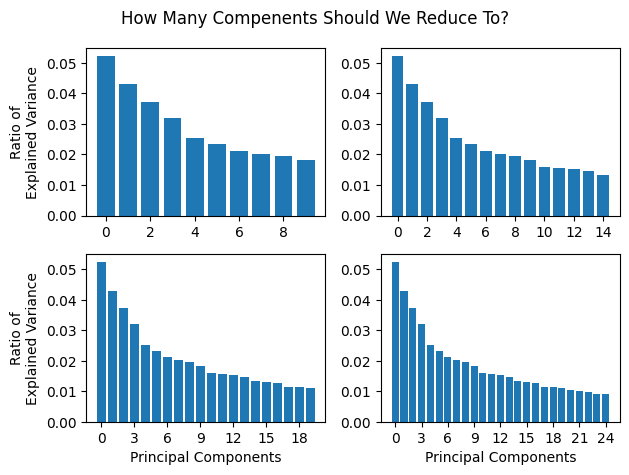

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=2)

n_components = 10
for row in range(2):
    for col in range(2):
        pca = PCA(n_components=n_components)
        pca.fit(emb.values)
        x = range(len(pca.explained_variance_ratio_))
        y = pca.explained_variance_ratio_
        
        ax[row, col].bar(x, y)
        ax[row, col].xaxis.set_major_locator(MaxNLocator(integer=True))

        if row == 1:
            ax[row, col].set_xlabel("Principal Components")
        if col == 0:
            ax[row, col].set_ylabel("Ratio of\nExplained Variance")

        n_components += 5

plt.suptitle("How Many Compenents Should We Reduce To?")
plt.tight_layout()
plt.savefig("principal-component-analysis.png", dpi=200)

#### Ok, let's just go with _10_ components

In [67]:
n_components = 10
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(emb.values)

In [68]:
clustering = MeanShift(cluster_all=True).fit(reduced)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

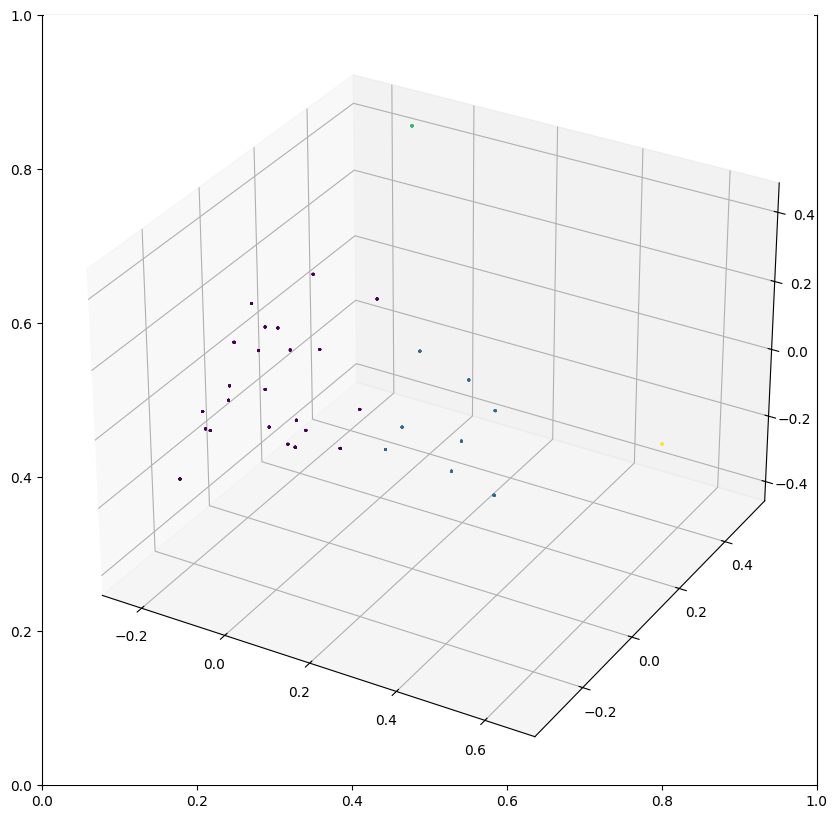

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(reduced[:,0], reduced[:,1], reduced[:,2], alpha=0.5, s=1, c=clustering.labels_)

In [59]:
reduced

array([[-6.73514259e-02, -2.26835303e-01,  2.58666124e-01],
       [-2.31685980e-01, -9.72327111e-02, -1.36003046e-01],
       [ 1.21857023e-01,  2.65455126e-02, -1.49249587e-01],
       ...,
       [-7.59579687e-02,  9.39592194e-02,  3.16839655e-02],
       [-1.29607402e-01,  3.28827008e-01, -3.20904181e-01],
       [ 3.92821781e-01,  2.22388133e-04,  8.17475537e-02]])

In [58]:
reduced[:,1].shape

(900,)

In [64]:
len(set(reduced.flatten()))

233